In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import linear_model
import gc

In [3]:
train_df=pd.read_csv('../input/heart.csv')

In [4]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
train_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
three_std = 3
outlrs = 0

# loop throgh whole dataframe
for i, j in enumerate(train_df.columns):
    # Check if std is greater than 0 for the math
    if train_df.std()[i] > 0:
        z_score = (i - train_df.mean()[i]) / train_df.std()[i] 
        # Uses z score to check for outliers amd adds it to a count 
        if np.abs(z_score) > three_std:
            outlrs = outlrs + 1

print(outlrs)

12


In [10]:
replce_nan = train_df.mask(train_df.sub(train_df.mean()).div(train_df.std()).abs().gt(3))
replce_nan.isnull().sum().sum() 

56

In [14]:
replce_median = replce_nan.fillna(replce_nan.median())
replce_median.isnull().sum().sum()

0

In [15]:
train_df[['exang', 'target']].groupby(['exang']).mean()

,target
exang,
0,0.669118
1,0.205797


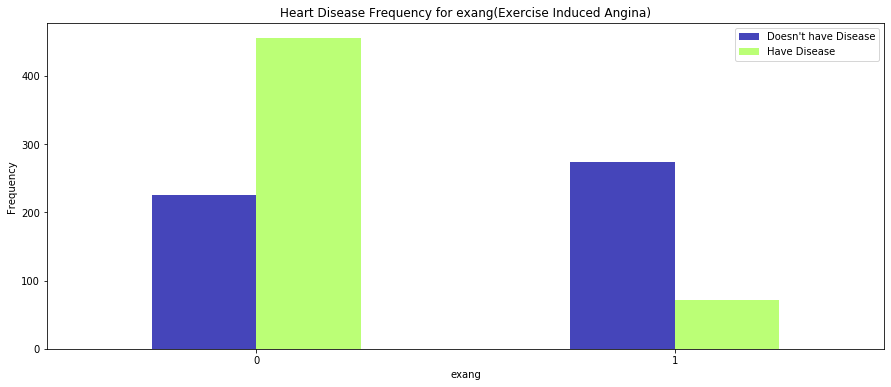

In [16]:
pd.crosstab(train_df.exang,train_df.target).plot(kind="bar",figsize=(15,6),color=['#4545ba','#bbff76' ])
plt.title('Heart Disease Frequency for exang(Exercise Induced Angina)')
plt.xlabel('exang')
plt.xticks(rotation=0)
plt.legend(["Doesn't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

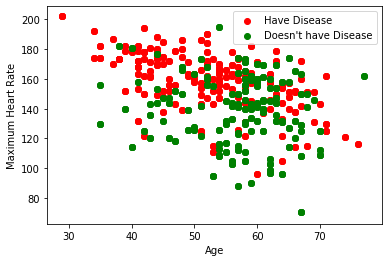

In [17]:
plt.scatter(x=train_df.age[train_df.target==1], y=train_df.thalach[(train_df.target==1)], c="red")
plt.scatter(x=train_df.age[train_df.target==0], y=train_df.thalach[(train_df.target==0)],c="green")
plt.legend(["Have Disease", "Doesn't have Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

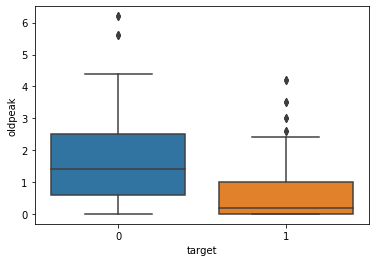

In [18]:
sns.boxplot(x=train_df.target, y=train_df.oldpeak, data=train_df)

In [19]:
y = train_df.target.values
x_data = train_df.drop(["target"],axis=1)

In [20]:
# Normalizing
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

x_train 820
x_test 205
y_train 820
y_test 205


In [94]:
svm_classifi = SVC(random_state = 1)
svm_classifi.fit(x_train,y_train)

print("Accuracy of SVM Algo: {:.2f}".format(svm_classifi.score(x_test,y_test)*100))

Accuracy of SVM Algo: 86.83
